# Import library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Import dataset from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load model

In [13]:
# load saved model and try predictions

# load CT model
CT_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/model_CT.h5')
CT_model.layers[0].input_shape

# load risk model
risk_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/risk.h5')
risk_model.layers[0].input_shape

# load mortality model
mor_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/mor.h5')
mor_model.layers[0].input_shape

# load covid positivity model
CP_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/CP.h5')
CP_model.layers[0].input_shape



(None, 224, 224, 3)

# Use model to predict image

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CT Predicted class: 1
Risk Predicted class: 0
Mortality Predicted class: 2
Covid Positivity Predicted class: 1


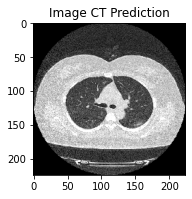

In [14]:
# image prediction
img1 = os.path.join('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Demo Patient/IMG-0001-00062.jpg' )

img_CT = load_img(img1, target_size=(224, 224))
x = img_to_array(img_CT)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Perform prediction

# Predict image CT 
classes = CT_model.predict_classes(images, batch_size=10)
# display image and prediction
plt.figure()
plt.subplot(121)
plt.title("Image CT Prediction") 
plt.imshow(img_CT)
print("CT Predicted class: " + str(classes[0]))

# Risk Predict
classes = risk_model.predict_classes(images, batch_size=10)
# display image and prediction
print("Risk Predicted class: " + str(classes[0]))

# Mortality Predict
classes = mor_model.predict_classes(images, batch_size=10)
# display image and prediction
print("Mortality Predicted class: " + str(classes[0]))

# Covid Positivity Predict
classes = CP_model.predict_classes(images, batch_size=10)
# display image and prediction
print("Covid Positivity Predicted class: " + str(classes[0]))

